In [9]:
from KernelML import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys

%matplotlib widget

In [ ]:
original_stdout = sys.stdout

### Reading Data

In [10]:
Data = pd.read_csv('data.csv',header=None)
Atoms = Data.iloc[:,0].values
serial = 0
index = []
for i in range(len(Atoms)):
    if Atoms[i].isdigit()==True:
        serial+=1/2
        if serial.is_integer()==True:
            index.append(i)

### Storing Data And Counting Atoms

In [12]:
AtomData = []
NonH = []

for i in range(len(index)-1):
    NH = 0
    AtomData.append(Data.iloc[index[i]:index[i+1]-1, 0:4].values)
    for j in range(index[i]+1,index[i+1]-1):
        if Atoms[j]!="H":NH+=1
            
    NonH.append(NH)
    
AtomData = np.array(AtomData,dtype=object)

In [13]:
AtomData[0]

array([['0001', -417.031, nan, nan],
       ['C', 1.04168, -0.0562, -0.07148],
       ['H', 2.15109, -0.0562, -0.0715],
       ['H', 0.67187, 0.17923, -1.09059],
       ['H', 0.67188, 0.70866, 0.64196],
       ['H', 0.67188, -1.05649, 0.23421]], dtype=object)

### Distribution of Non H atoms in Data

Elements in dictionary :\
1st element - no. of NonH atoms in a molecules\
2nd element - no. of molecules containting that no. of NonH atoms

In [14]:
NonHCounts = {i:NonH.count(i) for i in NonH}
#NonHCounts # 1st element - no. of Non H atoms in a molecules
           # 2nd element - no. of molecules containting that no. of Non H atoms

### Number of molecule containing 4 or less non H atoms

In [15]:
N = sum(NonHCounts[i] for i in range(1,5))
# sort = lambda molecule : len(molecule) # sorting by number of atoms
# sorted(AtomData[N:],key=sort)

### Selecting 1 K molecules

i) First N (ie 59) molecules selected from atom data and then 1000-N (ie 941) molecules selected at random to make Training Data.

ii) Random molecules are selcted by creating mask for less than $\frac{1000-N}{len(AtomData[N:]}$ (ie 0.13362681056518036*100 % data which is 941 molecules) 

iii) Remainng Data is selected using the same mask

In [16]:
# mask = np.load('mask1.npy')

In [17]:
mask = Mask(len(AtomData[N:]),1000-N) # to select 941 molecules
RandomSample = AtomData[N:][mask]
RemainingSample = AtomData[N:][~mask]

# mask = Mask(len(RemainingSample),100)
# HoldOutSet = RemainingSample[mask]
# RemainingSample = RemainingSample[~mask]

In [18]:
# np.save("mask1",mask)

In [19]:
# mask = np.load('mask2.npy')

In [20]:
mask = Mask(len(RandomSample),100)
HoldOutSet = RandomSample[mask]
RandomSample = RandomSample[~mask]

In [21]:
# np.save("mask2",mask)

In [22]:
AtomDataTrain = np.concatenate((AtomData[0:N],RandomSample),dtype=object)
AtomDataRemaining = RemainingSample

In [23]:
#len(HoldOutSet),len(AtomDataTrain),len(AtomDataRemaining)

### Representation Matrix

In [24]:
VRCTrain,YTrain = RepresentationMatrix(AtomDataTrain)
VRCHoldOut,YHoldOut = RepresentationMatrix(HoldOutSet)

### Optimizing Kernel

In [25]:
Grid = []
for i in np.linspace(-50,-5,91):
    for j in np.linspace(5,19,29):
        Grid.append((2**i,2**j))

In [26]:
ErrorArray = []
SigArray = []
lammArray = []
epoch = 0
for i,j in Grid:
    lamm = i
    Sig = j    
    
    Kernel = KERNEL(VRCTrain,VRCTrain,Sig)
    L = KERNEL(VRCTrain,VRCHoldOut,Sig)

    alpha = np.matmul(np.linalg.inv(Kernel+lamm*np.identity(len(VRCTrain))), YTrain)
    f = np.matmul(L.T, alpha)

    Error = np.sqrt(np.mean((f-YHoldOut)**2))
    ErrorArray.append(Error)
    SigArray.append(Sig)
    lammArray.append(lamm)
    with open('LossInfo.txt','a+') as g3:
      sys.stdout = g3
      print(epoch,lamm,Sig,Error)
      sys.stdout = original_stdout
    epoch += 1

    
#print(min(Error))

KeyboardInterrupt: 

81.32791794200858

In [170]:
# for i in range(len(f)):
#     print(np.array(YHoldOut)[i],f[i])

In [119]:
# grid = np.array([i for i in range(1,len(f)+1)])

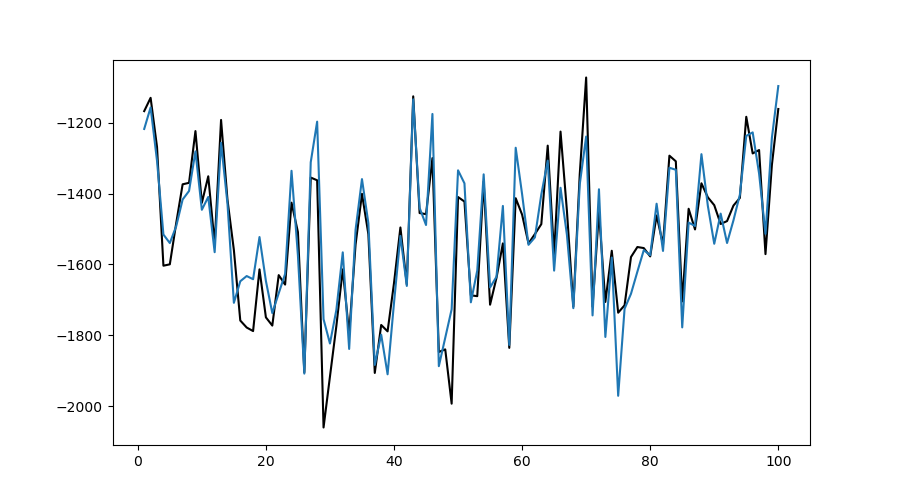

In [130]:
# fig = plt.figure(figsize =(9, 5))
# plt.plot(grid,YHoldOut,'k')
# plt.plot(grid,f)

In [12]:
# Mij[:,0] # column
# Mij[[0,1]]=Mij[[1,0]] # row swap
# Mij[:, [1, 0]] = Mij[:, [0, 1]] # column swap

### Plot Molecule

In [1]:
# j=500 # jth molecule

# fig = plt.figure(figsize =(7, 5))
# ax = fig.add_subplot(111,projection ='3d')
# for i in range(len(AtomData[j])):
#                ax.scatter(AtomData[j][i][1],AtomData[j][i][2],AtomData[j][i][3],s=400,c='blue', alpha=0.5)

NameError: name 'plt' is not defined